In [2]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import os 
from sklearn.neighbors import KNeighborsClassifier
from scipy.signal import find_peaks

In [3]:
if os.path.getsize('/Users/utkucicek/Desktop/bme 261/peak-data.pkl')> 0 :
    with open('/Users/utkucicek/Desktop/bme 261/peak-data.pkl', 'rb') as file:
        loaded = pickle.load(file)
print(loaded)

# print(loaded['ecg'])

{'ecg': array([-0.13249 , -0.13264 , -0.13268 , ..., -0.037058, -0.024631,
       -0.011471]), 'indices': array([  352,   450,   685,   726,   821,  1048,  1087,  1183,  1408,
        1449,  1550,  1788,  1830,  1933,  2155,  2199,  2301,  2530,
        2572,  2672,  2878,  2920,  3015,  3195,  3235,  3331,  3531,
        3572,  3674,  3891,  3932,  4037,  4243,  4283,  4385,  4575,
        4613,  4714,  4911,  4948,  5043,  5217,  5256,  5352,  5521,
        5559,  5657,  5824,  5864,  5969,  6137,  6175,  6277,  6434,
        6473,  6580,  6719,  6758,  6860,  7008,  7046,  7143,  7302,
        7337,  7431,  7581,  7617,  7710,  7859,  7898,  7994,  8144,
        8184,  8279,  8437,  8476,  8577,  8723,  8759,  8856,  8989,
        9026,  9118,  9236,  9272,  9364,  9481,  9518,  9610,  9731,
        9770,  9863, 10002, 10040, 10138, 10276, 10316, 10414, 10543,
       10584, 10682, 10845, 10886, 10984, 11207, 11246, 11345, 11551,
       11590, 11687, 11898, 11936, 12034, 12249, 12288

In [4]:
ecg = np.array(loaded['ecg'])
indices = np.array(loaded['indices'])
labels = np.array(loaded['labels'])
print(ecg.shape)
print(indices.shape)
labels.shape


(16200,)
(148,)


(148,)

In [5]:
fs = 360
T = 45
time = np.linspace(0, T, fs * T)
signal = ecg[:fs * T]
signal = np.array(signal)
print(time.shape) 
signal.shape

(16200,)


(16200,)

Text(0, 0.5, 'signal (mV)')

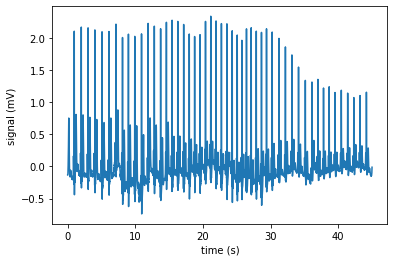

In [6]:
plt.plot(time,signal)
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')

In [7]:
indices

array([  352,   450,   685,   726,   821,  1048,  1087,  1183,  1408,
        1449,  1550,  1788,  1830,  1933,  2155,  2199,  2301,  2530,
        2572,  2672,  2878,  2920,  3015,  3195,  3235,  3331,  3531,
        3572,  3674,  3891,  3932,  4037,  4243,  4283,  4385,  4575,
        4613,  4714,  4911,  4948,  5043,  5217,  5256,  5352,  5521,
        5559,  5657,  5824,  5864,  5969,  6137,  6175,  6277,  6434,
        6473,  6580,  6719,  6758,  6860,  7008,  7046,  7143,  7302,
        7337,  7431,  7581,  7617,  7710,  7859,  7898,  7994,  8144,
        8184,  8279,  8437,  8476,  8577,  8723,  8759,  8856,  8989,
        9026,  9118,  9236,  9272,  9364,  9481,  9518,  9610,  9731,
        9770,  9863, 10002, 10040, 10138, 10276, 10316, 10414, 10543,
       10584, 10682, 10845, 10886, 10984, 11207, 11246, 11345, 11551,
       11590, 11687, 11898, 11936, 12034, 12249, 12288, 12387, 12609,
       12651, 12755, 12964, 13003, 13103, 13283, 13320, 13415, 13581,
       13618, 13711,

In [8]:
def t_waves(signals):
   peaks=find_peaks(signals, height=[0.1,1], distance=210)
   height = peaks[1]['peak_heights']
   peak_pos =time[peaks[0]]
   return peak_pos,height

In [9]:
def p_waves(signals):
   peaks=find_peaks(signals, height=[-1,0.3], distance=240)
   height = peaks[1]['peak_heights']
   peak_pos =time[peaks[0]]
   return peak_pos,height

In [10]:
def r_waves(signals):
   peaks=find_peaks(signals, height=[1.0,5], distance=210)
   height = peaks[1]['peak_heights']
   peak_pos =time[peaks[0]]
   return peak_pos,height

In [11]:
peak_pos_t, height_t = t_waves(ecg)
peak_pos_r, height_r = r_waves(ecg)
peak_pos_p, height_p = p_waves(ecg)


In [12]:
len(peak_pos_p)

49

Text(0, 0.5, 'signal (mV)')

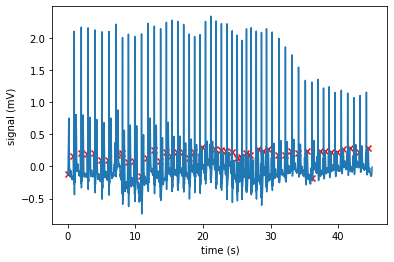

In [13]:
plt.plot(time,signal)
plt.scatter(peak_pos_p, height_p, marker='x', color='red')
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')


In [14]:
distance_r =[]
for i,(r,t) in enumerate(zip(height_r,height_t)):
    if i == 49:
        break
    dist = t - r
    distance_r.append(dist)
distance_p =[]
for i,(t,p) in enumerate(zip(height_t,height_p)):
    if i == 48:
        break
    dist = p - t
    distance_p.append(dist)
distance_t =[]
for i,(r,p) in enumerate(zip(height_r,height_p)):
    if i == 49:
        break
    dist = r - p
    distance_t.append(dist)
    

In [15]:
print(len(distance_p))
print(len(distance_t))
print(len(distance_r))

48
49
49


In [16]:
# summation = 0
# for index,i in enumerate(peak_pos_r):
#     if index ==49:
#         break
#     summation += peak_pos_r[index+1] - peak_pos_r[index] 
#     r_mean = summation/index
# summation = 0
# for index,i in enumerate(peak_pos_t):
#     if index ==49:
#         break
#     summation = peak_pos_t[index+1] - peak_pos_t[index] 
#     t_mean = summation/index
# summation = 0
# for index,i in enumerate(peak_pos_p):
#     if index ==48:
#         break
#     summation += peak_pos_p[index+1] - peak_pos_p[index] 
#     p_mean = summation/index

In [17]:
# r=[]
# t=[]
# p=[]

# for index,i in enumerate(peak_pos_r):
#     if index ==49:
#         break
#     summation = peak_pos_r[index+1] - peak_pos_r[index] 
#     r.append(summation)
# for index,i in enumerate(peak_pos_t):
#     if index ==49:
#         break
#     summation = peak_pos_t[index+1] - peak_pos_t[index] 
#     t.append(summation)
# summation = 0
# for index,i in enumerate(peak_pos_p):
#     if index ==48:
#         break
#     summation = peak_pos_p[index+1] - peak_pos_p[index] 
#     p.append(summation)


In [18]:

tr,tt,tp=[],[],[]
for index,i in enumerate(height_r):
    if index ==49:
        break
    tr.append(i)
for index,i in enumerate(height_t):
    if index ==49:
        break
    tt.append(i)
summation = 0
for index,i in enumerate(height_p):
    if index ==48:
        break
    tp.append(i)


In [19]:
r = np.array(r)
t = np.array(t)
p = np.array(p)
type(r)

numpy.ndarray

The difference between amplitudes were used in order to differentiate one from another

Text(0.5, 0, 'Vertical Distance Difference')

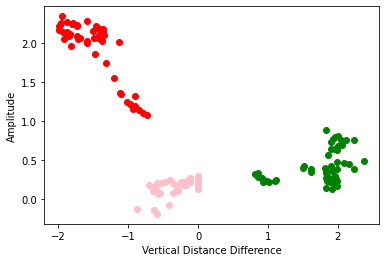

In [20]:
plt.scatter(distance_r,tr, color='red')
plt.scatter(distance_t,tt, color='green')
plt.scatter(distance_p,tp, color='pink')
plt.ylabel("Amplitude")
plt.xlabel("Vertical Distance Difference")

In [ ]:
distance_r =[]
for i,(r,t) in enumerate(zip(height_r,height_t)):
    if i == 49:
        break
    dist = t - r
    distance_r.append(dist)
distance_p =[]
for i,(t,p) in enumerate(zip(height_t,height_p)):
    if i == 48:
        break
    dist = p - t
    distance_p.append(dist)
distance_t =[]
for i,(r,p) in enumerate(zip(height_r,height_p)):
    if i == 49:
        break
    dist = r - p
    distance_t.append(dist)
    

**QUESTION 4**

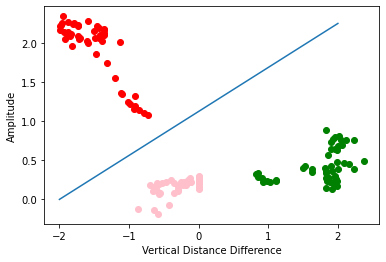

In [28]:
plt.scatter(distance_r,tr, color='red')
plt.scatter(distance_t,tt, color='green')
plt.scatter(distance_p,tp, color='pink')
plt.ylabel("Amplitude")
plt.xlabel("Vertical Distance Difference")
y = (1/20)*time
x = np.linspace(-2,2,16200)
plt.plot(x,y)

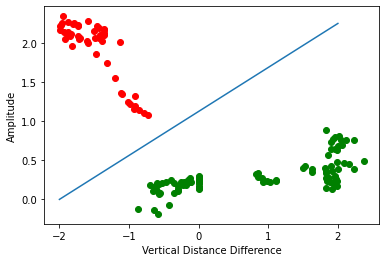

In [32]:
plt.scatter(distance_r,tr, color='red')
plt.scatter(distance_t,tt, color='green')
plt.scatter(distance_p,tp, color='green')
plt.ylabel("Amplitude")
plt.xlabel("Vertical Distance Difference")
y = (1/20)*time
x = np.linspace(-2,2,16200)
plt.plot(x,y)

This can also be done with svms

0.2764581802297385
-1.8367218490031043


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


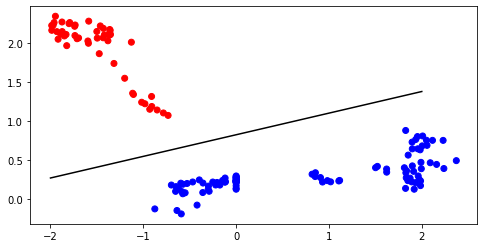

In [55]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []
for x,y in zip(distance_r, tr):
    X.append((x,y))
    Y.append([1])

for x,y in zip(distance_p, tp):
    X.append((x,y))
    Y.append([0])

for x,y in zip(distance_t, tt):
    X.append((x,y))
    Y.append([0])

X = np.array(X)
Y = np.array(Y)

# fit the model
clf = svm.SVC(kernel='linear', C=1000) # C is important here
clf.fit(X, Y)
plt.figure(figsize=(8, 4))
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2, 1000)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-") #********* This is the separator line ************
print(a)
print(clf.intercept_[0])
colors = ['blue','red']
used_colors = []
for val in Y:
    used_colors.append(colors[val[0]])
plt.scatter(X[:, 0], X[:, 1], c=used_colors)
plt.show()